# Análise de Vendas de Jogos 
**Explorando Tendências, Plataformas e Comportamento do Mercado Gamer**  

---

## 📌 Contexto  
O mercado de jogos eletrônicos é um dos setores mais dinâmicos do entretenimento, com crescimento acelerado por inovações tecnológicas como cloud gaming, realidade virtual e consoles de última geração.

Este projeto analisa o dataset [Video Game Sales 2024](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024) contendo dados de vendas de jogos até 2024, com o objetivo de responder a perguntas como:  
- 🎮 **Qual plataforma (PlayStation, Xbox, Nintendo, PC) dominou as vendas?**  
- 📊 **Quais gêneros (ação, RPG, esportes) tiveram melhor desempenho?**  
- 💰 **Existe correlação entre datas de lançamento e picos de vendas?**

---

## 🎯 Objetivos  
1. Identificar **jogos e plataformas com maior impacto comercial**.   
2. Analisar a **relação entre gêneros de jogos e desempenho de vendas**.  
3. Fornecer insights para **tomada de decisão estratégica** no setor.  

---

## 🗂️ Índice

- 📦 [Importações](#importações)
- 🛠️ [Manipulações](#primeiras-manipulações)
- 🏆 [Jogos Mais Vendidos](#jogos-mais-vendidos)
- 🎮 [Jogos Mais Vendidos Por Plataforma](#jogos-mais-vendidos-por-plataforma)
- 📊 [Gêneros Mais Vendidos](#análise-gênero-x-vendas)
- ⭐ [Gêneros Mais Bem Avaliados](#análise-de-gênero-x-crítica)
- ⏳ [Histórico De Vendas](#vendas-x-tempo)
- 📚 [Editoras Que Mais Publicaram Jogos](#editoras-que-mais-publicaram-jogos)
- 💰 [Editoras Que Mais Venderam Jogos](#editoras-que-mais-venderam-jogos)


---

## 📂 Sobre o Dataset  
- **Fonte:** [Kaggle](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024) os dados foram coletados do site [VGChartz](https://www.vgchartz.com/).  
- **Escopo:**  
  - +10 mil registros de vendas globais.  
  - Variáveis incluídas: `title`, `console`, `genre`, `publisher`, `developer`, `critic_score`, `total_sales`, `na_sales`, `jp_sales`, `pal_sales`, `other_sales`, `release_date`. 

## 🛠️ Tecnologias Utilizadas
- **Linguagem**: Python 🐍
- **Bibliotecas**: Pandas, Matplotlib, Seaborn, NumPy
- **Ferramentas**: Jupyter Notebook, Kaggle

## 📢 Conecte-se Comigo!
🔗 **GitHub**: [Matheus Morandi](https://github.com/MatheusMorandi)  
🔗 **LinkedIn**: [Matheus Morandi](https://www.linkedin.com/in/matheusmorandi/)  

Se você gostou deste projeto, deixe uma ⭐ no repositório! 😃

# Importações

---

In [2]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

import warnings 

warnings.filterwarnings('ignore')

# Primeiras Manipulações

---

In [3]:
ds = pd.read_csv('../data/vgchartz-2024.csv', sep = ",")

print("Resumo do dataset:")

print(ds.info())

print("\nEstatísticas gerais:")

print(ds.describe())

print("\nValores ausentes:")

print(ds.isnull().sum())

Resumo do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None

Estatísticas gerais:
       critic_score   total_sales      na_sales     jp_sales     pal_sales  \
count   6678.000000  18922.

In [4]:
ds = ds.drop(columns = ["img", "last_update"])

In [5]:
games_mais_vendido = ds.groupby("title")['total_sales'].sum().sort_values(ascending = False).head(10)

games_mais_vendido

title
Grand Theft Auto V                64.29
Call of Duty: Black Ops           30.99
Call of Duty: Modern Warfare 3    30.71
Call of Duty: Black Ops II        29.59
Call of Duty: Ghosts              28.80
Call of Duty: Black Ops 3         26.72
Call of Duty: Modern Warfare 2    25.02
Minecraft                         24.01
Grand Theft Auto IV               22.53
Call of Duty: Advanced Warfare    21.78
Name: total_sales, dtype: float64

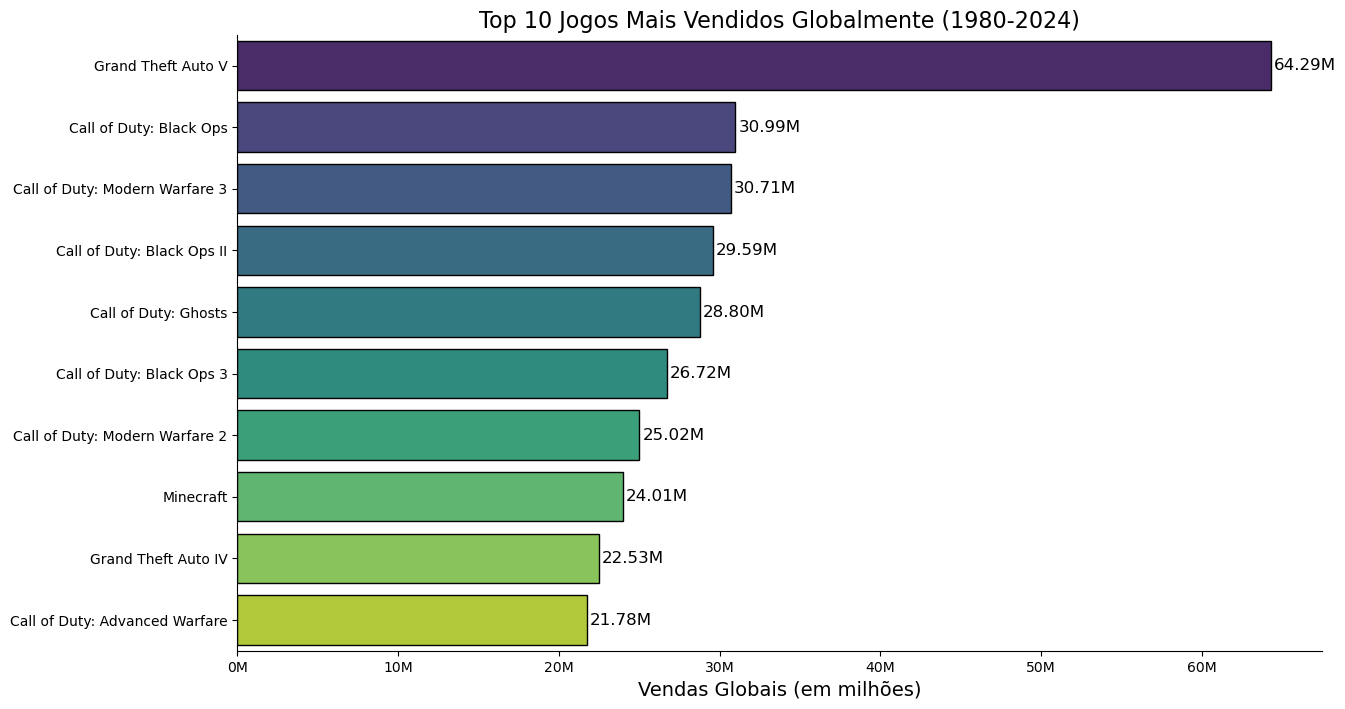

In [6]:
plt.figure(figsize = (14,8))

ax = sns.barplot(
    data = pd.DataFrame(games_mais_vendido),
    x = games_mais_vendido.values,
    y = games_mais_vendido.index,  
    palette = "viridis", 
    edgecolor="black",
    hue = games_mais_vendido.index, 
    legend = False)

def formatador(x, pos):
    return f'{x:.0f}M'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2fM", padding = 2, fontsize = 12)

plt.title("Top 10 Jogos Mais Vendidos Globalmente (1980-2024)", fontsize = 16, pad = 5)

plt.xlabel("Vendas Globais (em milhões)", fontsize = 14)

plt.ylabel("")

sns.despine()

plt.show()

# jogos Mais Vendidos

---

### Observando o Gráfico acima podemos notar uma discrepância bem acentuada entre o primeiro "Grand Theft Auto V" e o segundo "Call of Duty: Black Ops" colocados, onde o "Gta V" tem o dobro de valor do "Call of Duty: Black Ops". Uma característica em comum em todos os jogos selecionados é a presença do modo online, possibilitando os jogadores a desfrutarem do jogo além da história. Outro ponto que vale ser destacado, é o fato de que jogos como "Gta V" e "Minecraft" contam com diversos mod's disponibilizados pela própria comunidade, o que acarreta em ainda mais conteúdo fora da história padrão dos jogos.

In [7]:
plataformas = ds.groupby(["title", "console"])['total_sales'].sum().sort_values(ascending = False).head(15)

plataformas

title                           console
Grand Theft Auto V              PS3        20.32
                                PS4        19.39
Grand Theft Auto: Vice City     PS2        16.15
Grand Theft Auto V              X360       15.86
Call of Duty: Black Ops 3       PS4        15.09
Call of Duty: Modern Warfare 3  X360       14.82
Call of Duty: Black Ops         X360       14.74
Red Dead Redemption 2           PS4        13.94
Call of Duty: Black Ops II      X360       13.86
                                PS3        13.80
Call of Duty: Modern Warfare 2  X360       13.53
Call of Duty: WWII              PS4        13.40
Call of Duty: Modern Warfare 3  PS3        13.35
Grand Theft Auto III            PS2        13.10
Call of Duty: Black Ops         PS3        12.67
Name: total_sales, dtype: float64

In [8]:
df_pivot = plataformas.unstack(level='console').fillna(0)

df_pivot['Total'] = df_pivot.sum(axis=1)

df_pivot = df_pivot.sort_values('Total', ascending=True).drop('Total', axis=1)

df_pivot


console,PS3,PS4,PS2,X360
title,,,,
Grand Theft Auto III,0.00,0.00,13.10,0.00
Call of Duty: WWII,0.00,13.40,0.00,0.00
Call of Duty: Modern Warfare 2,0.00,0.00,0.00,13.53
Red Dead Redemption 2,0.00,13.94,0.00,0.00
Call of Duty: Black Ops 3,0.00,15.09,0.00,0.00
Grand Theft Auto: Vice City,0.00,0.00,16.15,0.00
Call of Duty: Black Ops,12.67,0.00,0.00,14.74
Call of Duty: Black Ops II,13.80,0.00,0.00,13.86
Call of Duty: Modern Warfare 3,13.35,0.00,0.00,14.82


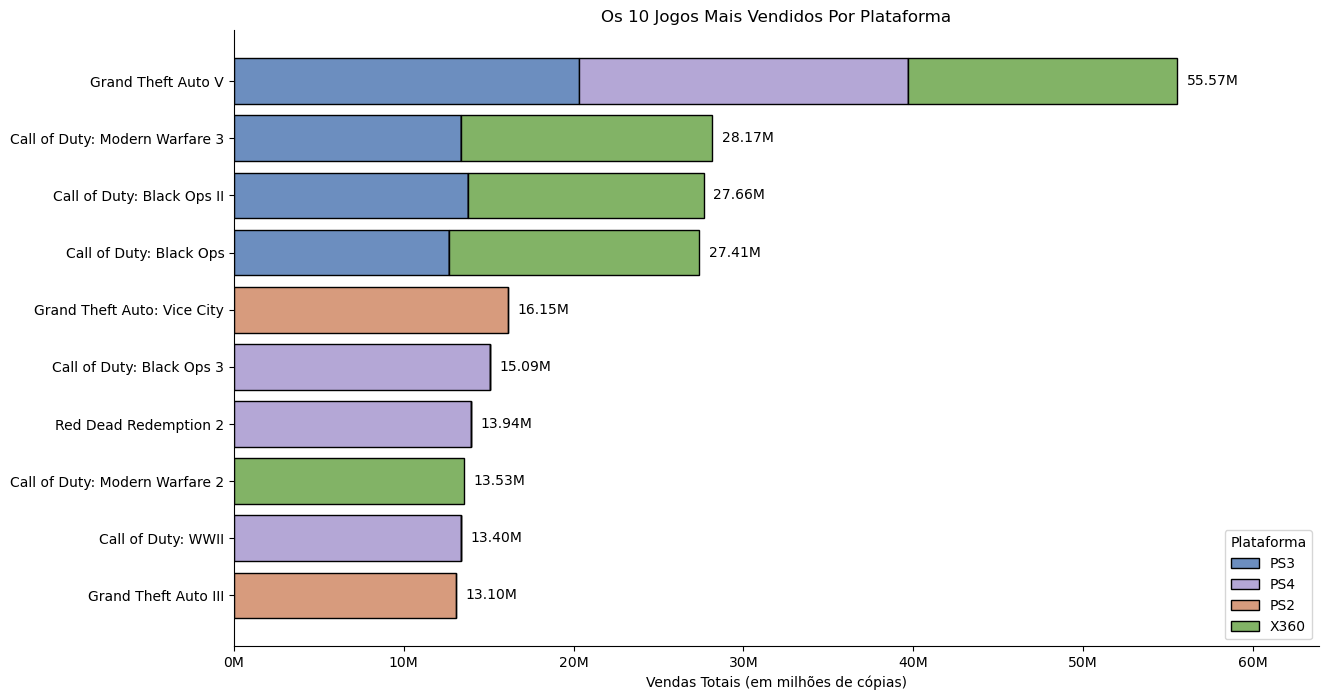

In [9]:
cores_consoles = {
    "PS3" : "#6C8EBF",   
    "PS4" : "#B4A7D6",   
    "PS2" : "#D79B7D",  
    "X360" : "#82B366"
}

plt.figure(figsize=(14, 8))

jogos = df_pivot.index

y_pos = np.arange(len(jogos))

left = np.zeros(len(jogos))

for console in df_pivot.columns:

    vendas = df_pivot[console].values

    plt.barh(
        y_pos,
        vendas,
        left = left,
        color = cores_consoles.get(console, "gray"),
        edgecolor="black",
        label = console
    )
    
    left += vendas    

offset = df_pivot.sum(axis=1).max() * 0.01  

for y, total in zip(y_pos, left):

    plt.text(
        total + offset,  
        y,             
        f"{total:.2f}M", 
        va = 'center',
        ha = 'left',
        fontsize = 10
    )

plt.yticks(y_pos, jogos)

plt.ylabel("")

plt.xlabel("Vendas Totais (em milhões de cópias)")

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

plt.xlim(0, df_pivot.sum(axis=1).max() * 1.15) 

handles, labels = plt.gca().get_legend_handles_labels()

labels_unicos = list(dict.fromkeys(labels))  

plt.legend(handles[:len(labels_unicos)], labels_unicos, title = "Plataforma", loc = "best")

plt.title("Os 10 Jogos Mais Vendidos Por Plataforma")

sns.despine()

plt.show()

# Jogos Mais Vendidos Por Plataforma

---

### Quando colocamos em foco as vendas por plataforma, temos algumas mudanças em relação ao panorama geral, como por exemplo a ausência de nomes como o Minecraft, que conta com suas vendas bem balanciadas entre as demais plataformas. O Gta V ainda continua no topo contando com o seu atributo de ser multiplataforma. Alguns títulos novos apareceram: "Grand Theft Auto III", "Call of Duty: WWII", "Red Dead Redemption 2", "Grand Theft Auto: Vice City". 

In [10]:
mine = ds[ds['title'] == 'Minecraft']

mine.head(7)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
54,Minecraft,PS4,Misc,Sony Computer Entertainment,Mojang,9.4,6.33,1.89,0.35,3.13,0.96,2014-10-07
58,Minecraft,PS3,Misc,Sony Computer Entertainment America,Mojang,NaN,6.05,2.21,NaN,2.86,0.99,2014-05-16
69,Minecraft,XOne,Misc,Microsoft Studios,Mojang,NaN,5.43,3.23,NaN,1.71,0.49,2014-11-18
366,Minecraft,PSV,Misc,Sony Computer Entertainment America,4J Studios,NaN,2.47,0.22,1.25,0.73,0.27,2014-11-11
571,Minecraft,NS,Sandbox,Mojang,4J Studios,9.2,1.89,0.69,0.52,0.56,0.12,2018-06-21
849,Minecraft,WiiU,Misc,Mojang,4J Studios,5.5,1.47,0.50,0.38,0.49,0.09,2016-06-17
4477,Minecraft,3DS,Misc,Nintendo,Other Ocean Interactive,6.7,0.37,0.33,NaN,NaN,0.04,2017-11-10


In [11]:
generos = ds.groupby(["genre"])["total_sales"].sum().sort_values(ascending = False).head(10)

generos

genre
Sports          1187.51
Action          1125.89
Shooter          995.50
Misc             557.79
Racing           525.75
Role-Playing     426.80
Platform         349.15
Fighting         341.13
Adventure        325.39
Simulation       300.65
Name: total_sales, dtype: float64

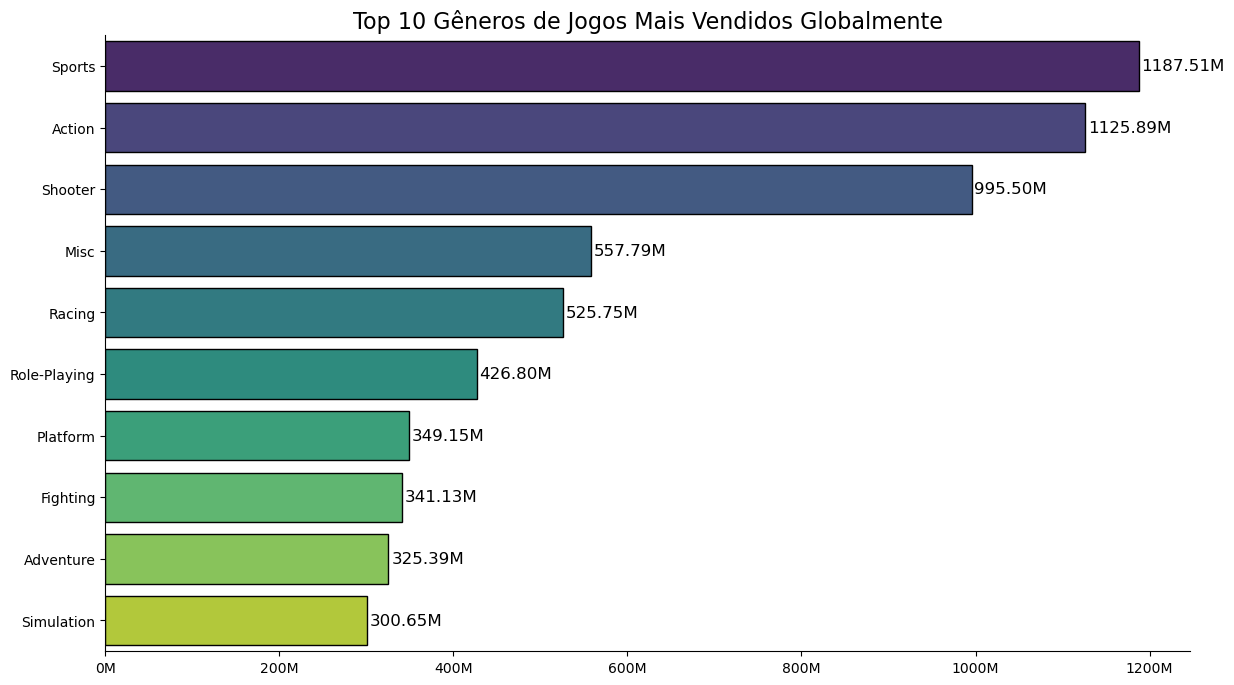

In [12]:
plt.figure(figsize = (14,8))

ax = sns.barplot(
    data = pd.DataFrame(generos),
    x = generos.values,
    y = generos.index,  
    palette = "viridis", 
    edgecolor="black",
    hue = generos.index, 
    legend = False)


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2fM", padding = 2, fontsize = 12)

plt.title("Top 10 Gêneros de Jogos Mais Vendidos Globalmente", fontsize = 16, pad = 5)

plt.xlabel("")

plt.ylabel("")

sns.despine()

plt.show()

# Análise Gênero X Vendas

---

### Quando observamos os gêneros mais vendidos, nota-se uma predominância por três gêneros específicos: Esportes, Ação e Jogos de Tiro, os quais, juntos, representam mais da metade das vendas totais.

In [13]:
generos_critica = ds.groupby("genre").agg({"critic_score" : "median", "total_sales" : "sum"})

generos_critica

,critic_score,total_sales
genre,,
Action,7.00,1125.89
Action-Adventure,7.80,148.52
Adventure,7.50,325.39
Board Game,5.30,0.33
Education,7.75,0.97
Fighting,7.70,341.13
MMO,7.50,9.31
Misc,7.10,557.79
Music,8.00,51.75


In [14]:
gen_orde_critica = generos_critica.sort_values(by = "critic_score", ascending = False)

gen_orde_critica

,critic_score,total_sales
genre,,
Sandbox,9.20,1.89
Visual Novel,8.50,5.78
Music,8.00,51.75
Action-Adventure,7.80,148.52
Education,7.75,0.97
Strategy,7.70,118.31
Fighting,7.70,341.13
Role-Playing,7.70,426.80
Sports,7.60,1187.51


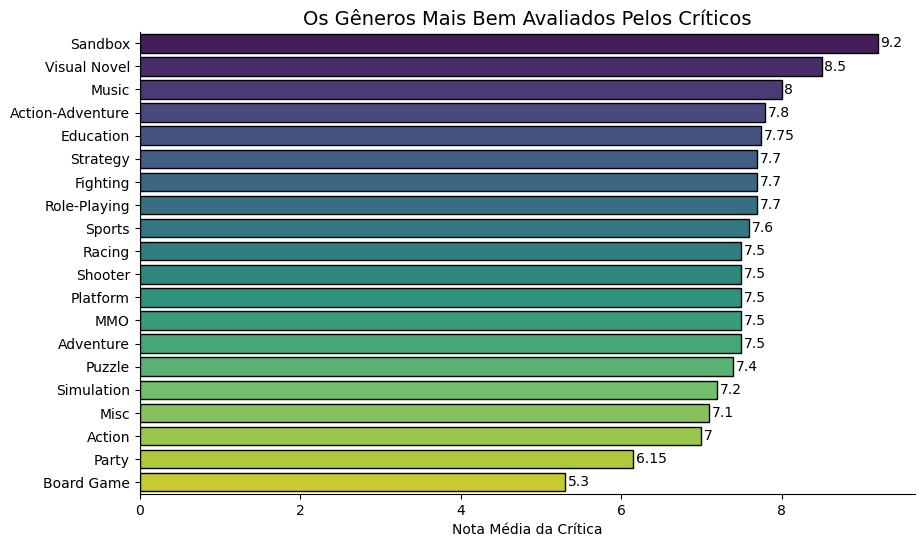

In [39]:
plt.figure(figsize = (10, 6))

grafico_critica_genero = sns.barplot(
                            x = gen_orde_critica["critic_score"],
                            y = gen_orde_critica.index, 
                            palette = "viridis", 
                            edgecolor="black",
                            hue = gen_orde_critica.index, 
                            legend = False)

for container in grafico_critica_genero.containers:
    grafico_critica_genero.bar_label(container, padding = 2, fontsize = 10)

plt.title("Os Gêneros Mais Bem Avaliados Pelos Críticos", fontsize = 14, pad = 5)

plt.xlabel("Nota Média da Crítica")

plt.ylabel("")

sns.despine()

plt.show()

# Análise de Gênero X Crítica

---

### Quando analisamos os gêneros mais bem avaliados pela crítica, podemos notar que não necessariamente uma gênero altamente elogiado pela crítica irá render boas vendas.

In [16]:
# Primeiro vamos converter a coluna release_date para datetime (para facilitar as manipulações)
ds['release_date'] = pd.to_datetime(ds['release_date']) 

# Agora criaremos uma coluna para armazenar a primeira data de lançamento para cada jogo
ds['first_release_date'] = ds.groupby('title')['release_date'].transform('min')

ds.head(5)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,first_release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2013-09-17
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015-11-06


In [17]:
# Agora agruparemos por jogo e primeira data de lançamento, somando as vendas
dados_consolidados = ds.groupby(["title", "first_release_date"]).agg({"total_sales":"sum"}).reset_index()

# Nesse ponto ordenaremos pela primeira data de lançamento
dados_consolidados = dados_consolidados.sort_values(by = "first_release_date")

dados_consolidados

,title,first_release_date,total_sales
32198,The Oregon Trail,1971-12-03,0.28
33570,Trek73,1973-10-08,0.00
21653,Nintengirls: College Girl & Friends,1975-10-12,0.00
23689,Pong Sports,1977-01-01,0.00
2966,Basic Math,1977-01-01,0.00
...,...,...,...
31087,Tekken 8,2024-01-25,0.00
13727,Helldivers 2,2024-02-08,0.00
33113,Tomb Raider I-III Remastered,2024-02-14,0.00
10801,Final Fantasy VII Rebirth,2024-02-29,0.00


In [18]:
serie_temporal = dados_consolidados.groupby("first_release_date")["total_sales"].sum().reset_index()

serie_temporal.set_index("first_release_date", inplace = True)

serie_temporal = serie_temporal.resample("ME").sum().fillna(0)

dados_consolidados["year"] = dados_consolidados["first_release_date"].dt.year

vendas_por_ano = dados_consolidados.groupby("year")["total_sales"].sum()

serie_temporal, vendas_por_ano

(                    total_sales
 first_release_date             
 1971-12-31                 0.28
 1972-01-31                 0.00
 1972-02-29                 0.00
 1972-03-31                 0.00
 1972-04-30                 0.00
 ...                         ...
 2024-08-31                 0.00
 2024-09-30                 0.00
 2024-10-31                 0.00
 2024-11-30                 0.00
 2024-12-31                 0.00
 
 [637 rows x 1 columns],
 year
 1971      0.28
 1973      0.00
 1975      0.00
 1977      2.50
 1978      3.36
 1979      0.31
 1980      3.55
 1981     17.12
 1982     38.91
 1983     27.73
 1984      5.81
 1985      1.80
 1986     12.61
 1987     11.37
 1988     20.59
 1989     13.86
 1990     15.25
 1991      9.32
 1992     16.91
 1993     29.94
 1994     41.22
 1995     57.01
 1996     94.06
 1997    105.94
 1998    132.57
 1999    181.33
 2000    186.84
 2001    224.39
 2002    294.72
 2003    286.67
 2004    289.44
 2005    309.76
 2006    257.87
 2007    4

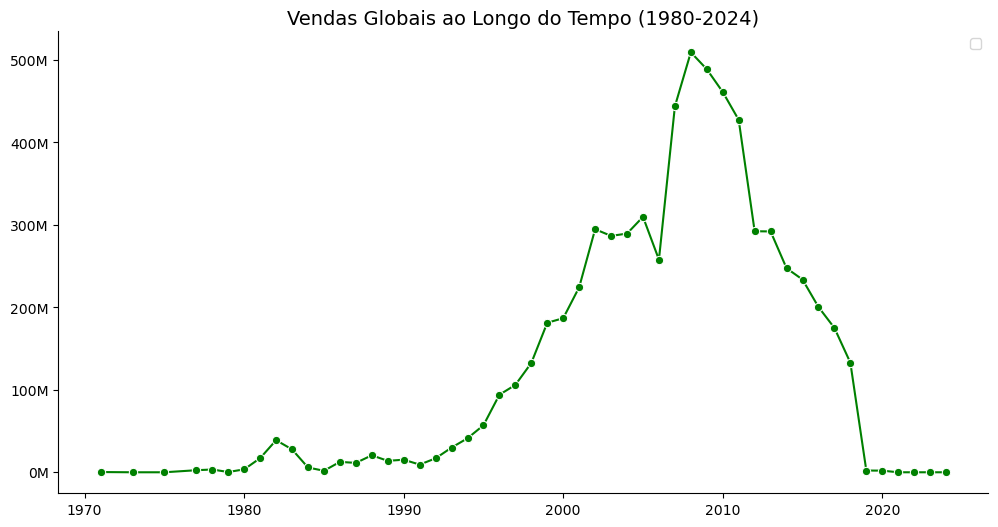

In [19]:
plt.figure(figsize=(12,6))

sns.lineplot(data = vendas_por_ano, marker='o', color = "green", legend = False)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formatador))

plt.title("Vendas Globais ao Longo do Tempo (1980-2024)", fontsize = 14, pad = 5)

plt.legend()

plt.ylabel("")

plt.xlabel("")

sns.despine()

plt.show()

# Vendas X Tempo

---

### Vamos criar uma série temporal com base na coluna `release_date`, e mesmo que um jogo tenha múltiplas datas por plataforma, iremos agregar os dados por jogo, usando uma data única, no caso o primeiro lançamento do jogo no mercado e depois pegamos as vendas anuais.

---

### Enquanto ao gráfico, ele nos mostra a evolução da indústria de jogos, marcada por revoluções tecnológicas e mudanças culturais. A partir dos anos 1980, a recuperação pós-crise do Atari e o sucesso do NES consolidaram os consoles em lares globais, enquanto os anos 1990 e 2000 trouxeram guerras de plataformas (Sega, Nintendo, Sony). Um dos possíves motivos para declínio das vendas de jogos pós 2010, pode se dar pela popularização de modelos de serviços de jogos por assinaturas (Game Pass) competindo com os modelos tradicionais.

In [ ]:
editoras = ds.groupby("publisher").agg({"title" : "count", "total_sales" : "sum"}).reset_index()

editoras

,publisher,title,total_sales
0,100 Gates,2,0.00
1,10TACLE Studios,6,0.48
2,10tons,7,0.00
3,10tons Ltd,32,0.00
4,11 bit studios,44,0.04
...,...,...,...
3378,tono / Ctrl+k,1,0.00
3379,tri-Ace,1,0.00
3380,uClick,2,0.00
3381,wooga,4,0.00


In [37]:
editoras_titulos = editoras.sort_values(by = "title", ascending = False).head(11)

editoras_titulos = editoras_titulos.drop(editoras_titulos[editoras_titulos["publisher"] == "Unknown"].index)

editoras_vendas = editoras.sort_values(by = "total_sales", ascending = False).head(10)


print(editoras_titulos)

print()

print(editoras_vendas)

                        publisher  title  total_sales
2540                         Sega   2207       206.38
3043                      Ubisoft   1663       462.57
852               Electronic Arts   1619       644.13
101                    Activision   1582       722.77
1564                       Konami   1544       210.70
2016                     Nintendo   1476       140.80
2674  Sony Computer Entertainment   1372       311.08
1819                    Microsoft   1272        17.28
2818                          THQ   1111       320.89
482                        Capcom   1092       131.24

                        publisher  title  total_sales
101                    Activision   1582       722.77
852               Electronic Arts   1619       644.13
813                     EA Sports    804       485.66
3043                      Ubisoft   1663       462.57
2818                          THQ   1111       320.89
2674  Sony Computer Entertainment   1372       311.08
2445               Rockstar

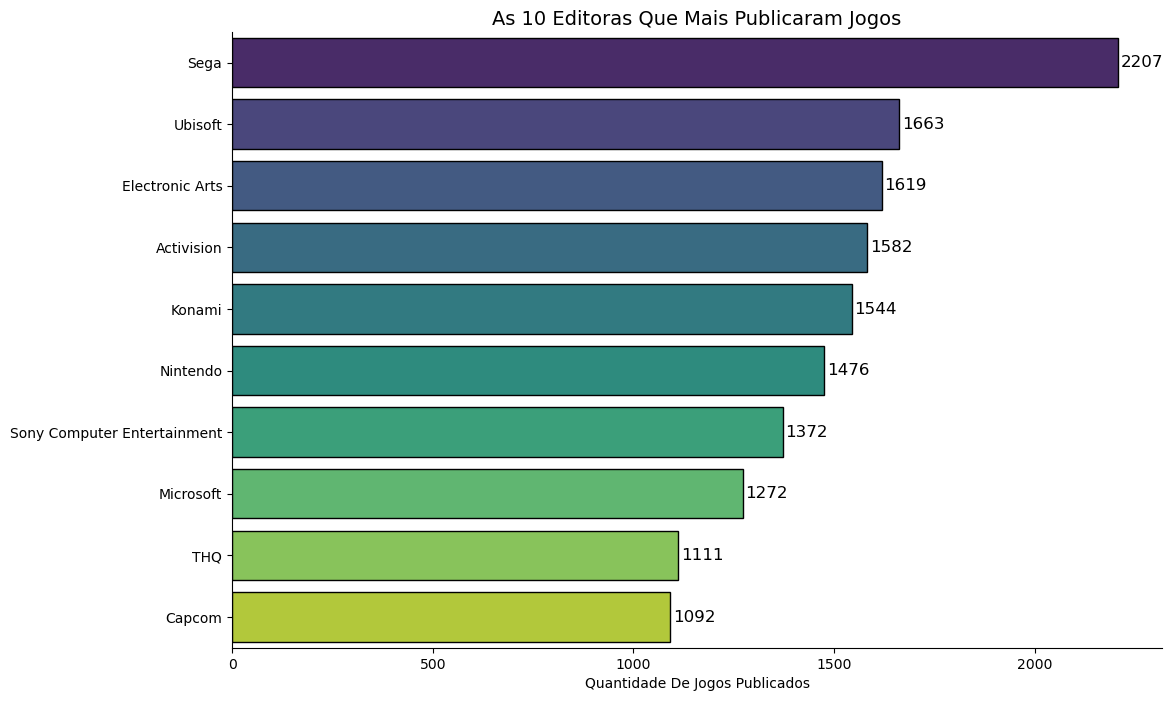

In [41]:
plt.figure(figsize = (12, 8))

grafico_editoras = sns.barplot(
                    x = editoras_titulos["title"],
                    y = editoras_titulos["publisher"],
                    palette = "viridis",
                    hue = editoras_titulos["publisher"],
                    edgecolor = "black",
                    legend = False)

for container in grafico_editoras.containers:
    grafico_editoras.bar_label(container, padding = 2, fontsize = 12)

plt.title("As 10 Editoras Que Mais Publicaram Jogos", pad = 5, fontsize = 14)

plt.ylabel("")

plt.xlabel("Quantidade De Jogos Publicados")

sns.despine()

plt.show()

# Editoras Que Mais Publicaram Jogos

---

### Com base no gráfico, podemos observar que a Sega aparece como a editora com mais jogos publicados (cerca de 2000), superando gigantes como Nintendo e Sony. Uma possível explicação para isso: A Sega teve uma forte presença em arcades e consoles antigos (ex: Mega Drive/Genesis) nos anos 80/90, além de franquias clássicas como Sonic e Yakuza.

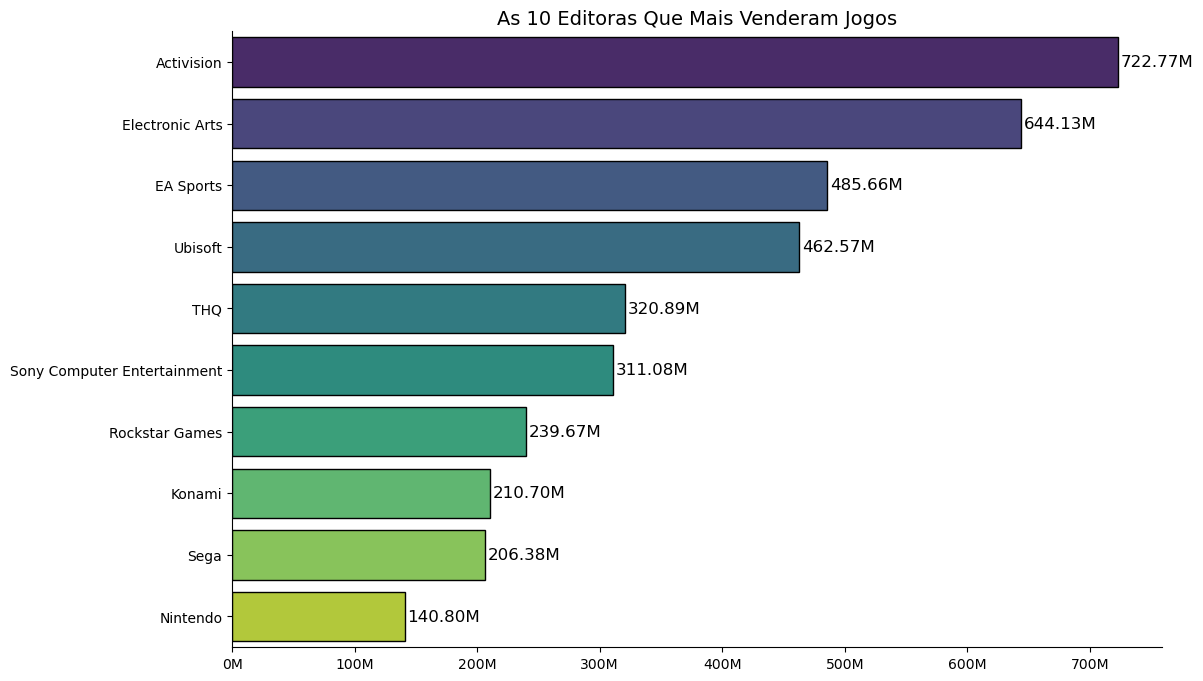

In [43]:
plt.figure(figsize = (12, 8))

grafico_editoras_vendas = sns.barplot(
                    x = editoras_vendas["total_sales"],
                    y = editoras_vendas["publisher"],
                    palette = "viridis",
                    hue = editoras_vendas["publisher"],
                    edgecolor = "black",
                    legend = False)

for container in grafico_editoras_vendas.containers:
    grafico_editoras_vendas.bar_label(container,fmt = "%.2fM", padding = 2, fontsize = 12)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

plt.title("As 10 Editoras Que Mais Venderam Jogos", pad = 5, fontsize = 14)

plt.ylabel("")

plt.xlabel("")

sns.despine()

plt.show()

# Editoras Que Mais Venderam Jogos

---

### O primeiro gráfico (mais publicações) revela que a Sega lidera em volume (2000 jogos), mas desaparece no ranking de vendas, evidenciando que quantidade não garante sucesso comercial. Já a Activision, top 1 em vendas (722M), aposta em poucas franquias lucrativas (Call of Duty), enquanto a Nintendo (140M), prioriza s exclusividade. EA e Ubisoft equilibram ambos os rankings, com séries anuais (FIFA) e IPs diversificadas (Assassin's Creed). Já a Rockstar (239M) comprova que um único fenômeno (GTA) supera editoras com dezenas de jogos.